<a href="https://colab.research.google.com/github/HongWonSeok/STUDY/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%9C%EC%A6%8C2_LAB_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **모두의 딥러닝 시즌2 with Pytorch - LAB 03**

Multivaratiate Linear Regression

- 여러개의 정보로 부터 하나의 추측값을 계산하는 것

**목차**

- Simple Linear Regression 복습
- Multivarate Linear Regression 이론
- Naive Data Representation
- Matrix Data Representatoin
- Multivarate Linear Regression
- nn.Module 소개
- F.mse_loss 소개

#  Multivarate Linear Rgression

여러개의 정보가 주어질때 하나의 예측값을 계산하는 것

예를들어 쪽지시험의 점수가 73,80,75점을 가질때 기말고사를 몇점을 받을지 예측하는 방법

이것도 Simple Linear Regression과 같이 데이터를 torch.FloatTensor()로 표현가능

In [1]:
import torch

#data
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

**Hypothesis Function**
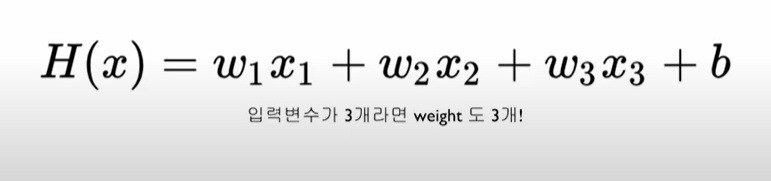




hypothesis function을 계산을 할때 가장 간단한 방법은 아래 사진과 같다 

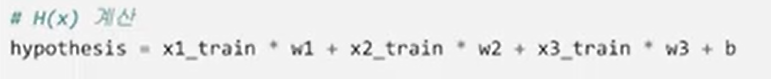

하지만 x에 더많은 정보가 있다면 hypothesis를 계산하는 코드는 점점 더 길어진다.

그래서 matmul()이라는 함수를 사용하면 더 간결하고 빠른 코드가 된다.

hypothesis = x_train.matmul(W) + b // or .mm or @

**Multivarate Cost Function & Gradient Descent**

- 기존 SImple Linear Regression과 동일
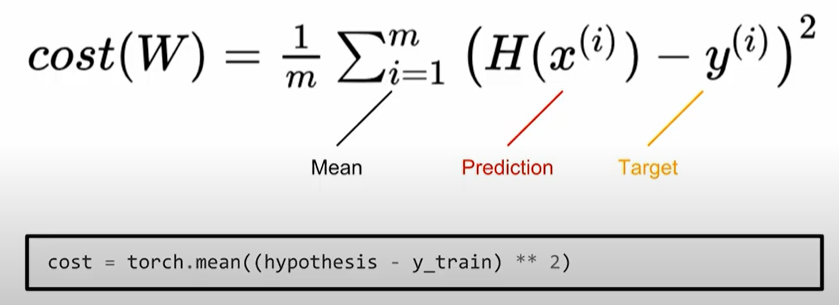


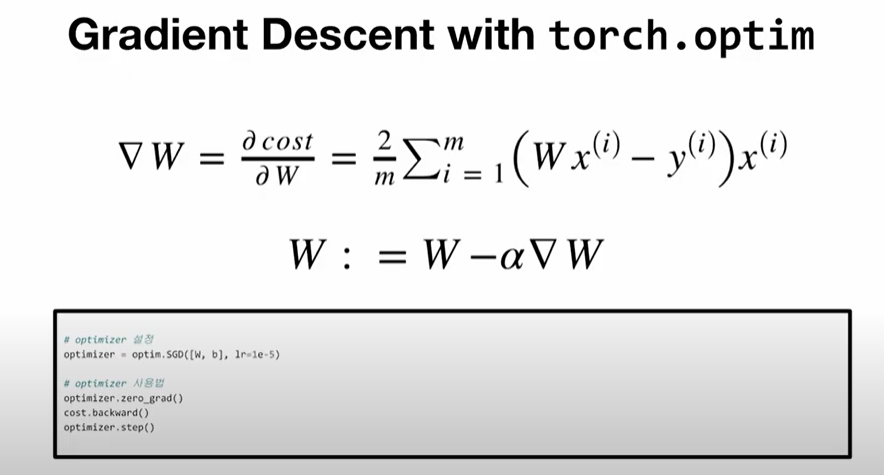

**Full Code**

In [9]:
import torch.optim as optim

# 데이터
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad= True)

# optimizer 설정
optimizer = optim.SGD([W,b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs +1):

  # H(x) 계산
  hypothesis = x_train.matmul(W) + b # or .mm or @

  # cost 개선
  cost = torch.mean((hypothesis - y_train)**2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{}  hypothesis: {} cost: {:.6f}'.format(
      epoch,nb_epochs, hypothesis.squeeze().detach(), cost.item()
  ))

Epoch    0/20  hypothesis: tensor([0., 0., 0., 0., 0.]) cost: 29661.800781
Epoch    1/20  hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) cost: 9298.520508
Epoch    2/20  hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) cost: 2915.712402
Epoch    3/20  hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) cost: 915.040527
Epoch    4/20  hypothesis: tensor([137.7967, 165.6247, 163.1911, 177.7112, 126.3307]) cost: 287.936096
Epoch    5/20  hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) cost: 91.371063
Epoch    6/20  hypothesis: tensor([148.1035, 178.0143, 175.3980, 191.0042, 135.7812]) cost: 29.758249
Epoch    7/20  hypothesis: tensor([150.1744, 180.5042, 177.8509, 193.6753, 137.6805]) cost: 10.445267
Epoch    8/20  hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) cost: 4.391237
Epoch    9/20  hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) cost: 2.493121
Epoch   

결과를 보게되면 Cost가 점점 0으로 줄어드는 모습을 보이고, H(x)의 값이 점점 y_train값에 가까워진다.  

**nn.Module**

w와 b를 일일이 써주기는 모델이 커질수록 힘들 수 있기 때문에 pytorch에서는 nn.Module을 제공해준다.

In [11]:
# 모델 초기화
W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad=True)

# H(x) 계산
hypothesis = x_train.matmul(W) + b

In [41]:
import torch.nn as nn

# nn.Module을 상속해서 모델 생성 - 인공신경망을 만드는데 편하게 해 줌
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1) # 입력차원: 3, 출력차원: 1 임을 알려준다.
  # Hypothesis 계산은 forward()에서 한다.
  def forward(self, x):
    return self.linear(x)

#hypothesis = model(x_train)

#Gradient 계산은 backward()에서 PyTorch가 알아서 해준다 


**F.mse_loss**

PyTorch의 cost Function의 장점
- 다른 cost Function(l1_loss, smooth_l1_loss 등)으로 바꿀때 편리함
- cost Function을 계산할 때 생기는 버그가 없어서 디버깅 할 떄 편함

In [15]:
# cost 계산
cost = torch.mean((hypothesis - y_train) ** 2)

In [27]:
import torch.nn.functional as F

# cost 계산
cost = F.mse_loss(hypothesis, y_train)

**FULL CODE**

In [49]:
# 데이터
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화

model = MultivariateLinearRegressionModel()

# optimizer 설정
#------optimizer = optim.SGD([W,b], lr=1e-5)------
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs +1):

  # H(x) 계산
  hypothesis = model(x_train)

  # cost 개선
  cost = F.mse_loss(hypothesis, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{}  hypothesis: {} cost: {:.6f}'.format(
      epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
  ))

Epoch    0/20  hypothesis: tensor([ 1.8890, -2.3490,  0.0603, -0.1744, -2.6855]) cost: 29885.917969
Epoch    1/20  hypothesis: tensor([69.3922, 78.7868, 80.0038, 86.8821, 59.2011]) cost: 9373.385742
Epoch    2/20  hypothesis: tensor([107.1842, 124.2121, 124.7610, 135.6217,  93.8496]) cost: 2943.794189
Epoch    3/20  hypothesis: tensor([128.3421, 149.6444, 149.8188, 162.9091, 113.2485]) cost: 928.454712
Epoch    4/20  hypothesis: tensor([140.1872, 163.8833, 163.8476, 178.1862, 124.1096]) cost: 296.750854
Epoch    5/20  hypothesis: tensor([146.8183, 171.8555, 171.7017, 186.7392, 130.1908]) cost: 98.741959
Epoch    6/20  hypothesis: tensor([150.5303, 176.3192, 176.0987, 191.5276, 133.5959]) cost: 36.673653
Epoch    7/20  hypothesis: tensor([152.6081, 178.8185, 178.5603, 194.2083, 135.5027]) cost: 17.215549
Epoch    8/20  hypothesis: tensor([153.7709, 180.2182, 179.9383, 195.7090, 136.5707]) cost: 11.113491
Epoch    9/20  hypothesis: tensor([154.4214, 181.0021, 180.7097, 196.5491, 137.1691